In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from datetime import datetime


# Plotting modules
import bokeh.io
import bokeh.plotting

# i want mouseover tooltips
from bokeh.models import HoverTool

# for user friendly referencing of data when plotting
from bokeh.models import ColumnDataSource

    # i want to render my figures in the notebook
bokeh.io.output_notebook()

Loading BokehJS ...

A few months ago, COVID-19 was a big deal, but COVID infection in a friend or family member was a rare phenomenon. A few weeks ago, cases were on an unprecedented tear&mdash;very possibly due to widespread travel and gathering during the holidays&mdash;and it felt like COVID was closing in one close friend, coworker or family member at a time. These days, people are getting vaccinated&mdash;even the non-healthcare employed general public&mdash;daily case rates are declining, and COVID feels like a much smaller deal than before. This is great.

*Howeverrrrr*, COVID-19 is a **public** health crisis, meaning we all need to stay committed to quarantine procedures until the **public** at large has been vaccinated. Yes, this means more masks, social distancing and regular COVID testing. It also means being very careful about gathering&mdash;or ideally avoiding gatherings at all. After all this time under quarantine, contiuing to avoid family and friends, remaining locked out of our favorite hubs of activity (gyms, restaurants, bars, community centers, etc) is reaching an all-time level of emotional difficulty. That difficulty should not be trivialized; the intent of this article is to provide a quantitative understanding of the continuing public health risk of COVID-19 that can be weighed against the mental and emotional risks of quarantine. Hopefully it suggests some best practices and ways of thinking that can keep as many people COVID-free as possible during the (hopefully) tail end of this pandemic.

By examining the most recent COVID-19 case data in Los Angeles County, the "goodness" metrics of commmon COVID tests and the data from the major COVID vaccine trials, we can discuss the risk of COVID exposure when gathering, the value of COVID testing in determining COVID status and the right way to think about a mixed group of vaccinated and non-vaccinated people.

The big question on my mind (and probably every potential gatherer's mind) is: "is it possible to gather people safely in the context of this pandemic?". To decide whether we can gather people "safely" during this COVID-19 pandemic, we first have to acknowledge that any gathering will incur some additional risk of COVID exposure/spread/infection beyond the normal risks inherent in daily (quarantined) life. So the question is *really*, what is the risk of exposure posed by gathering and do we feel that risk is low enough to call a gathering "safe"? It's much easier to work out a number estimate of risk than it is to decide if that number is "low", "high", "scary" or "safe", but we can draw from our own instinct as well as decision making criteria in science to help with that determination.

It may seem biased to consider the quantitative safety of gathering before the superseding question of whether gathering is approprate *at all*, but I think numbers provide helpful context to determine just how rigid our morals are. Regardless, COVID-19 data in particular&mdash;and how it might be usefully interpreted by regular folks&mdash;is frustratingly opaque and we might learn something beyond the safety of a gathering by its analysis.

The main point of quarantine behavior is to avoid contact with COVID (+) people. That's the only way to assure there is zero chance of having COVID transmitted to you, or you transmitting it to someone else, **even if you are vaccinated**. So we should try to calculate the probability that we are successful in avoiding COVID (+) people despite any gathering or human contact we may be having. To begin, let's get some data. As an example, I'll work with data provided for Los Angeles county on their COVID19 Surveillance website (http://dashboard.publichealth.lacounty.gov/covid19_surveillance_dashboard/)

In [3]:
#file downloaded from source above
file = '20210204_LA_County_Covid19_cases_deaths_date_table.csv'

#open the data here
df = pd.read_csv(file)

#get rid of possibly unreliable most recent information
df = df.drop(0, 'index')

In [4]:
def get_date (string):
    """
    This takes a text string date and turns it into a more useful datetime format
    """
    try:
        time = datetime.strptime(string, '%m/%d/%Y')
    except:
        time = datetime.strptime(string, '%Y-%m-%d')
    return time

In [5]:
#convert the dates in the original data to something easier to use
df['date'] = df['date_use'].apply(get_date)

#get rid of unnecessary columns and make it look nice
df = df.drop(["Unnamed: 0", "date_use"], axis=1)
cols = list(df.columns)
df = df[[cols[-1]] + cols[:-1]]

Below is a plot of the most recent case and death data from LA county, mouseover to see the exact numbers on each recent date. I've excluded the most recent date's entry (possibly today) since it may be incomplete. We can see a distinct periodicity to the results. Approximately every 7th day there is a drop in confirmed COVID cases for reasons I don't understand and won't try to explain here. During the intervening days, case numbers are more or less constant. We are clearly on a downward trend in daily case numbers, but are still recording multiple times more cases per day than we did before the holidays.

In [6]:
#create the bokeh dataframe-like object for sending data to figure
recent_data = ColumnDataSource(df.head(200))

# Create a figure
daily_case_fig = bokeh.plotting.figure(title='Los Angeles County',
             plot_height=400, plot_width=700,
             x_axis_label='Date', y_axis_label='Daily New Cases',
             x_axis_type='datetime')

# Remove the gridlines from the figure() object. Pretty lame that you can't change this during figure creation
daily_case_fig.grid.visible = False

# Show daily case line
daily_case_fig.line('date','new_case',
         color='gray', line_width=2,
         legend_label='New cases per day',
         source = recent_data
        )

# Put the legend in the upper left corner
daily_case_fig.legend.location = 'top_left'


# content of tooltip
tooltips = [
            ('Date', '@date{%F}'), # i don't know why the {%F} thing is necessary to make the datetime show up right in tip
            ('New Cases','@new_case')
           ]

# format the tooltip
form = {
        '@date' : 'datetime' # use 'datetime' formatter for '@date' field
    }

# Add the HoverTool to the figure
daily_case_fig.add_tools(HoverTool(tooltips=tooltips, formatters=form, mode='vline'))


bokeh.io.show(daily_case_fig)

In [7]:
df.head(65)['date']

1    2021-02-01
2    2021-01-31
3    2021-01-30
4    2021-01-29
5    2021-01-28
        ...    
61   2020-12-03
62   2020-12-02
63   2020-12-01
64   2020-11-30
65   2020-11-29
Name: date, Length: 65, dtype: datetime64[ns]

Here's a look at the raw numbers as well as the other values being tracked over the last 14 days. The media and most COVID surveillance websites that I've seen overemphasize the *total* number of COVID-19 cases reported over *all time* ("total_cases" in the table below), which looks big and scary, but is not actually an informative piece of information. The value we care about when evaluating a gathering is "daily new cases" ("new_case" in the table below), but only new cases over the last couple weeks. The infectious period for someone with COVID-19 is ~14 days, meaning only people who tested positive within the last 14 days could be *active* spreaders of disease.

In [8]:
tot = df.head(14)['new_case'].sum()
print('Total new cases (considered currently active cases) over the last 14 days: ', tot)
df.head(14)

Total new cases (considered currently active cases) over the last 14 days:  68694


,date,total_cases,new_case,avg_cases,total_deaths,new_deaths,avg_deaths
1,2021-02-01,1070458,2525,3921.0,16344,85,100.0
2,2021-01-31,1067933,1572,4317.0,16259,100,110.0
3,2021-01-30,1066361,3338,4455.0,16159,108,110.0
4,2021-01-29,1063023,3836,4524.0,16051,90,114.0
5,2021-01-28,1059187,4806,4825.0,15961,103,121.0
6,2021-01-27,1054381,5369,5119.0,15858,94,127.0
7,2021-01-26,1049012,6000,5498.0,15764,117,137.0
8,2021-01-25,1043012,5299,5893.0,15647,156,141.0
9,2021-01-24,1037713,2535,5999.0,15491,100,142.0
10,2021-01-23,1035178,3820,6213.0,15391,140,148.0


Now that we have the raw data for the county, we can start estimating the risks of gathering people together. The way we will do this is:

-**First**, calculate the probability that a person in a region (in this case LA county) is an *active* COVID case using the 14 day new case total we found above. We assume that every person in the county is just like every other person and thus has the same probability of being COVID (+). This is not strictly true now that some parts of the population have been vaccinated, but since those sectors are relatively small, we will ignore them for simplicity.

Whether or not we would consider ourselves or other groups a privileged group (based on socioeconomic status, job type etc.) with lower than average risk of being COVID (+), the determination of increased/decreased risk would be arbitrary, overcomplicated, and introduce significant risk of bias blinding us to true risks we all face as residents of our region. Thus we assume that "I am he as you are he as you are me and we are all"...the same.

The data reported around the country for COVID is almost always *confirmed cases*, which means the number of positive tests reported in the region. But the number of *actual* cases in a region will almost certainly be greater than the number of *confirmed* cases due to the possibility of asymptomatic (probably untested) infection, poor test availability, or social factors that would keep people&mdash;even sick people&mdash;from getting tested. So we'll make a guess at how many times more actual cases there are than confirmed cases and multiply our calculated infection probability by that number. This is usually called an *ascertainment bias*.

-**Second**, we treat the gathering of many people like a collection of flipped coins, in which each person's COVID-19 status is the result of a very biased coin flip (not 50-50) with heads representing COVID (+) and tails COVID (-). The bias of the coin&mdash;the probability of a head&mdash;is exactly the probability of active infection we calculated in the first step. In the language of probability and statistics, this is called drawing from a binomial distribution or modeling a system using a binomial distribution. In this calculation, we can start thinking about how to deal with vaccinated people.

The calculation we'll make using this model is:

    What is the probability that NOBODY at a gathering is an active COVID case?
    
The opposite side of this calculation is, "what is the probability that AT LEAST one person at a gathering is an active COVID case?"

Up to this point, the steps taken are not the first analysis of this type to be publicly available. There is a great tool available from Georgia Tech (Georgia Institute of Technology) that implements this exact process to determine gathering risk in every county in America (https://covid19risk.biosci.gatech.edu).

-**Third**, we look to medical statistics literature (which is really just regular statistics literature) about disease screening tests&mdash;the COVID tests you can hopefully get in your region&mdash;and calculate the probability that someone is an active COVID case even *after* they have received a negative test result. It is important to emphasize that all tests have the possibility to return false positives or negatives, and a negative test is *not* a confirmation that someone is not infected. This step will tell us just how much a negative test tells us about our COVID status.

Then we will rerun the binomial model to answer the new question:

    What is the probability that NOBODY at a gathering is an active COVID case after everyone has tested negative for COVID?

## First: probabillity that a person is an active case

In [9]:
#total number of active cases is determined above

#roughly LA county population
la_pop= 10*10**6 #that's 10 million

#probability of active case, also known as pre test probability
pre_prob = tot/la_pop

#ascertainment biases, multipliers of confirmed cases to estimate actual pre-test probability in total pop
    #GA Tech estimates from blood test data a bias of 10, meaning there are 10x more actual cases than positive tests
a_biases = [1, 5, 10, 20]
a_bias_colors = ['#fdcc8a','#fc8d59','#e34a33','#b30000']

In [10]:
print('1) Probability that anyone in LA county is an active COVID case: ', pre_prob * 100, '% \n')
print('2) Probability that anyone is an active COVID case assuming 10x more cases than positive tests: ', pre_prob * 10 * 100, '%')

1) Probability that anyone in LA county is an active COVID case:  0.68694 % 

2) Probability that anyone is an active COVID case assuming 10x more cases than positive tests:  6.869400000000001 %


We've divided the number of active cases in LA county by the population of LA county to get the probability that any one person in the county is an active covid case. That number is "1)" above and it's pretty small!

That's not the whole story. The probability in "1)" is actually something less impactful, more like "the probability of being someone who has received a positive COVID test" or something like that. That doesn't say much. So now let's take Georgia Tech's assumption that there are 10x more *actual* cases than *confirmed* cases, see "2)". That gives us a probability of being actively COVID (+) greater than 5%. That's big! Percentages are sometimes hard to interpret; this would mean that in an ideal sample of LA county people, ~7 of 100 would be COVID (+). Depending on your original level of worry/suspicion/fear, that might positively or negatively change the way you think about the world outside your home.

## Second: probability that NOBODY in a group is COVID (+)

The story told by an event or system can guide you to the best choice of probability distribution to use to model the event/system. In the case of a COVID gathering, we have a bunch of independent people who have two possible states: COVID (+) or COVID (-), we have an estimate of the probability of each state in each individual and we want to model the probability that various numbers of people in the group are COVID (+). That sounds like a group of flipped coins to me, and we want to model the probability that various numbers of coins turn up heads. That's the story of the **binomial distribution**. The distribution is pictured below; we'll consider a "success" in this case to be COVID (+) status.

![binom equation](binomial-distribution-formula.png)

In the limiting case we're considering, that of 0 "successes" or 0 COVID (+) people in a group of size *n*, the equation reduces to:

![binom limiting case](binomial-0_eq.png)

In [11]:
#define a function to calculate the probability of 0 COVID cases in a group
def prob_nobody_has (rate, group_size):
    
    return (1-(rate))**group_size

In [12]:
#calculate probabilities for a range of group sizes and ascertainment biases

full = []
for s in range(1,31):
    data = {bias: prob_nobody_has(pre_prob*bias, s) for bias in a_biases}
    full.append(pd.DataFrame(data, np.array([s])))
    
df_pre = pd.concat(full)
df_pre.index.name = 'group_size'
df_pre.rename_axis("ascert_bias", axis="columns", inplace=True)

In [13]:
df_pre.head()

ascert_bias,1,5,10,20
group_size,,,,
1,0.993131,0.965653,0.931306,0.862612
2,0.986308,0.932486,0.867331,0.744099
3,0.979533,0.900458,0.807750,0.641869
4,0.972804,0.869530,0.752263,0.553684
5,0.966122,0.839664,0.700587,0.477614


Above is a table with the probabilities of a COVID-free gathering up to a group of 5 (it goes out to 30 total). Below is a plot of that table, comparing group size and the probability of having *zero* COVID (+) group members, using the probabilities we just estimated in section 1 and the equation pictured above. Each curve is calculated using a different ascertainment bias, the <span style="color:blue">blue</span> one is a bias of 1 or no bias at all, just using the raw probability of being a *confirmed* case by testing. The <span style="color:green">green</span> curve represents a bias of 10x, the value assumed by GA Tech. The <span style="color:purple">purple</span> line is set at 95% probability of the group being fully COVID free.

We can see that with increasing group size, the probability of being fully COVID free drops precipitously (it's actually *exponentially*). As we assume that *actual* cases exceed *confirmed* cases by larger ascertainment biases, even a single person is less than 95% likely to be COVID (-). 95% probability is an arbitrary threshold to meet to say a group is "safely" COVID free&mdash;it's frequently used in science, but usually for garbage reasons or no reason at all. Discussion is warranted to decide what a group's specific risk tolerance is.

--------------------------------
But what about vaccinated people? We know that the vaccines currently available (Pfizer, Moderna) are very effective at preventing COVID in vaccinated people

vaccines don't necessary stop people from spreading virus after they have been exposed, they may not get disease and they may not even test positive, but that doesn't mean a vaccinated person cannot transiently shed virus if they are exposed. Pretty simply, this means that a vaccinated person probably isnt very different from an unvaccinated one when we're thinking about the risks of transmitting disease at a gathering. Where masks are used to protect people around you from you, a vaccine is used to protect you from the people around you.

In [14]:
# Create a figure
naive_gather_fig = bokeh.plotting.figure(title='Gathering safety without tests',
                                        plot_height=400, plot_width=700,
                                        x_axis_label='Gathering Size', y_axis_label='Probability COVID-free',
                                        tools = 'pan, box_zoom, wheel_zoom, save, reset'
                                        )

# Remove the gridlines from the figure() object. Pretty lame that you can't change this during figure creation
naive_gather_fig.grid.visible = False

#set up columnDataSource
    #set the columns as strings (bokeh needs this to create CDS)
df_pre_forbokeh = df_pre.reset_index()


#loop over data and plot it
for bias, color in zip(a_biases, a_bias_colors):
    
    #have to set up a custom CDS for each plot so the tooltip has consistent column labels to use
    no_test_prob_CDS = ColumnDataSource(data={
                                            'group_size' : df_pre_forbokeh['group_size'],
                                            'prob' : df_pre_forbokeh[bias],
                                            'asc_bias' : [bias for x in df_pre_forbokeh['group_size']]
                                                })
    
    # Show probability curves for all ascertainment biases
    naive_gather_fig.line('group_size', 'prob', line_width=2, legend_label=str(bias), color=color,
                          source=no_test_prob_CDS)

    #create circles to enlarge the hitbox for showing hovertool
    circ = naive_gather_fig.circle('group_size', 'prob', size=10, color=color, alpha=1,
                            source=no_test_prob_CDS)


# Put the legend in the upper left corner
naive_gather_fig.legend.location = 'top_right'
naive_gather_fig.legend.title = 'Asc. bias'

# content of tooltip
tooltips = [
            ('Chance COVID-free', '@prob{%F0.11}'),
            ('Group Size', '@group_size'),
            ('Ascertainment Bias', '@asc_bias x')
           ]

# Add the HoverTool to the figure
naive_gather_fig.add_tools(HoverTool(tooltips=tooltips))


bokeh.io.show(naive_gather_fig)

Let's consider a hypothetical gathering of 10 people. They have a

In [15]:
print(df_pre.loc[10,10]*100, "%")

49.08219870876531 %


chance of being safely COVID free.

That probability of safety is pretty low and definitely outside my personal comfort zone. Only a bias of 1, or the assumption that there are *no* additional cases beyond those confirmed by testing (not very realistic), has a remotely comfortable probability of leaving our gathering COVID free.

If this were the end of the story, the gathering would be too unsafe for comfort and it would be terminated, before considering any moral quandary.

## Third: what if everyone has tested COVID (-)?

Now onto the most terribly explained topic in all of medical school education: sensitivity, specificity, positive/negative predictive value and the larger world of diagnostic statistics. Apologies for the large amount of text.

The main point of this section is the demonstration that for all but the best diagnostic tests, from biopsy results to physical therapy ACL tear tests, a negative result is not a *confirmation* that one is condition-free (and vice-versa). Tests of the tests themselves give us quantitative information about how "good" the test is; we'll use the information about "standard" RT-PCR COVID-19 tests to post-process the values we calculated in the above sections to find out how likely someone is to be an active COVID case *after* receiving a negative COVID test.

COVID test results can be sorted into 4 categories:

    -True positives (x) - a positive result from someone who actually has COVID

    -False positives (z) - a positive result from someone who doesn't have COVID

    -True negatives (j) - a negative result from someone who doesn't have COVID

    -False negatives (y) - a negative result from someone who actually has COVID

These can be summarized in a table (apologies if the handwriting is hard to interpret):

![true and false results table](medical_test_statistics_table.png)

If a population with and without COVID is tested using some screening test like the RT-PCR tests done on saliva/nasal mid-turbinate/nasopharyngeal samples (that's the mouth swab/shallow nose swab/*deep* nose swab tests), we can collect real numbers for each of the values *x*, *y*, *z*, and *j* above. Using those numbers we can calculate the named probabilities listed above (sensitivity, specificity, etc.). Results like these are usually collected and reported by laboratories in scientific papers that you can hopefully find on the internet.

To make it really clear, *sensitivity* is how good the test is at identifying real cases. *Specificity* is how good it is at identifying non-cases. The predictive values are more complicated, but are more relevant to our analysis. They tell you your new probability of being COVID (+) or (-) after receiving a (+) or (-) test. Great right?

Unfortunately, the raw predictive values taken from a literature source will probably not be valid for us because the source's data comes from a different population than the population we care about (e.g. us). Even though it's the same test being used for both populations, we have to take one additional step.

We instead compute odds and likelihood ratios. These are similar to probabilities, but instead *compare* the likelihoods of getting (+) or (-) test results, or the likelihoods of being COVID (+) or COVID (-). They also happen to be basically the same thing as gambling odds you see for horse races or presidentical elections or sports matches. Odds and likelihood ratios are expressed [# of outcomes of type A] : [# of outcomes of type B] said "A to B", they are related to probability in that the probability of outcome A is [# A] / [# A  +  # B].

Below is a figure describing the whole process of computing odds, likelihood ratios and the final *post-test* probability of COVID.

![likelihood transformation](likelihood_transformation.png)

Curative Inc. (https://curative.com/) runs testing for LA county. They direct collection of testee-collected saliva samples from testees and perform an RT-PCR amplification to check if COVID RNA is present (What is RT-PCR?: https://tinyurl.com/t428ptt).

Per their FDA Emergency Use Authorization info summary (https://www.fda.gov/media/137089/download), their test&mdash;administered the way it is at their high-volume drive-through testing sites and compared to RT-PCR of deep nasopharyngeal swab samples as a "gold standard"&mdash;is **65.2% sensitive (15/23) and 80.9% specific (17/21)**. Also from their data, when saliva sampling is specifically observed and directed by a physician, it is 100% sensitive and specific.

Their sample population is rather small (~20 unobserved, ~50 observed) for something as important and money making as large scale COVID screening. Curative seems to have the contract for testing at sites in LA county, perhaps more regions. The level to which testees are observed and directed may vary widely between the drive-thru and walk-up testing sites in LA county, so it may be best to assume the *least* sensitivity and specificity to be conservative in our analysis. Their website touts 90% sensitivity and 100% specificity; these results are not reported in the EUA summary and are not supported by the data in that summary. I have no idea where they get these values reported on their website front page.

Ok! Now that we have all that info, let's quickly process our initial *untested* probabilities of having COVID, subject to the ascertainment biases we've considered, into the probabilities of having COVID *after* receiving a negative test result.

In [16]:
def post_test_transform (pre_test_prob, sens, spec):
    """
    Implementing the calculations to transform a pre-test probability into a modified post-test probability
    
    This specifically only implements the calculations for a NEGATIVE TEST
    """
    
    disease_odds = pre_test_prob / (1 - pre_test_prob)
    
    likelihood_neg = (1 - sens) / spec
    
    transformed_odds = disease_odds * likelihood_neg
    
    post_test_prob = transformed_odds / (1 + transformed_odds)
    
    return post_test_prob

In [17]:
# curative saliva swab unobserved params
cur_noobs_sens = 15/23
cur_noobs_spec = 17/21

In [18]:
#calculate post negative test probabilities for a range of group sizes and ascertainment biases
#using unobserved curative saliva swab test

full = []
for s in range(1,31):
    data = {bias: prob_nobody_has(
                    post_test_transform(
                        pre_prob*bias, cur_noobs_sens, cur_noobs_spec), s) for bias in a_biases}
    full.append(pd.DataFrame(data, np.array([s])))
    
df_post = pd.concat(full)
df_post.index.name = 'group_size'
df_post.rename_axis("ascert_bias", axis="columns", inplace=True)

In [19]:
df_post.head()

ascert_bias,1,5,10,20
group_size,,,,
1,0.997037,0.984947,0.969281,0.935950
2,0.994082,0.970121,0.939505,0.876003
3,0.991137,0.955518,0.910645,0.819895
4,0.988200,0.941135,0.882670,0.767381
5,0.985272,0.926969,0.855556,0.718230


Above are the probabilities of having a COVID free gathering in groups up to 5 (again it goes out to 30) AFTER everyone there has received a negative COVID test from the "standard" LA county Curative COVID test facilities. If we continue to assume there are 10x more actual cases than confirmed cases, each individual person, by getting tested and receiving a negative result, *decreased* their probability of *having* COVID from 9.7% to 4.4%. This halving of COVID risk for each person is exponentially magnified by group size when considering the probability of having a COVID free gathering. Here's a plot below to roughly illustrate the effect of COVID testing on group risk, "+" markers with dashed lines are the new results after negative tests. Below the plot we'll pin a new number on our gathering of size 13.

In [42]:
test = pd.concat([df_pre[10], df_post[10]], axis=1)
test.columns = ['10_pre', '10_post']

In [44]:
test.head()

,10_pre,10_post
group_size,,
1,0.931306,0.969281
2,0.867331,0.939505
3,0.807750,0.910645
4,0.752263,0.882670
5,0.700587,0.855556


In [47]:
# TRYING WITH MULTILINE

# Create a figure
p = bokeh.plotting.figure(title='Gathering safety after negative tests',
                                        plot_height=400, plot_width=700,
                                        x_axis_label='Gathering Size', y_axis_label='Probability COVID-free',
                                        tools = 'pan, box_zoom, wheel_zoom, save, reset'
                                        )

# Remove the gridlines from the figure() object. Pretty lame that you can't change this during figure creation
tested_gather_fig.grid.visible = False

from bokeh.palettes import Spectral11
numlines=2
mypalette=Spectral11[0:numlines]

p.multi_line(xs=[test.index.values]*numlines,
                ys=[test[name].values for name in test],
                line_color=mypalette,
                line_width=5)

# content of tooltip
tooltips = [
            ('Chance COVID-free', '@10_pre{%F0.11}'),
            ('Chance COVID-free_post', '@10_post{%F0.11}')
           ]

# Add the HoverTool to the figure
p.add_tools(HoverTool(tooltips=tooltips))


bokeh.io.show(p)

In [31]:
# Create a figure
tested_gather_fig = bokeh.plotting.figure(title='Gathering safety after negative tests',
                                        plot_height=400, plot_width=700,
                                        x_axis_label='Gathering Size', y_axis_label='Probability COVID-free',
                                        tools = 'pan, box_zoom, wheel_zoom, save, reset'
                                        )

# Remove the gridlines from the figure() object. Pretty lame that you can't change this during figure creation
tested_gather_fig.grid.visible = False

#set up columnDataSource
    #set the columns as strings (bokeh needs this to create CDS)
df_post_forbokeh = df_post.reset_index()
#df_pre_forbokeh already exists from above


#loop over data and plot it
for bias, color in zip(a_biases, a_bias_colors):
    
    ### this section plots all the tested COVID free probabilities
    
    #have to set up a custom CDS for each plot so the tooltip has consistent column labels to use
    tested_prob_CDS = ColumnDataSource(data={
                                            'group_size' : df_post_forbokeh['group_size'],
                                            'prob' : df_post_forbokeh[bias],
                                            'asc_bias' : [bias for x in df_post_forbokeh['group_size']]
                                                })
    
    # Show probability curves for all ascertainment biases
    tested_gather_fig.line('group_size', 'prob', line_width=2, legend_label=str(bias), color=color, hover_color="navy", hover_alpha=0.6,
                          source=tested_prob_CDS)

    #create circles to enlarge the hitbox for showing hovertool
#     circ = tested_gather_fig.circle('group_size', 'prob', size=10, color=color, alpha=1,
#                             source=tested_prob_CDS)
    
    
    ### This section plots the untested COVID free probabilities
    
    #have to set up a custom CDS for each plot so the tooltip has consistent column labels to use
    no_test_prob_CDS = ColumnDataSource(data={
                                            'group_size' : df_pre_forbokeh['group_size'],
                                            'prob' : df_pre_forbokeh[bias],
                                            'asc_bias' : [bias for x in df_pre_forbokeh['group_size']]
                                                })
    
    # Show probability curves for all ascertainment biases
    tested_gather_fig.line('group_size', 'prob', line_width=2, legend_label=str(bias), color=color,
                          source=no_test_prob_CDS)

    #create circles to enlarge the hitbox for showing hovertool
#     circ = tested_gather_fig.circle('group_size', 'prob', size=10, color=color, alpha=1,
#                             source=no_test_prob_CDS)


    
    
# Put the legend in the upper left corner
tested_gather_fig.legend.location = 'top_right'
tested_gather_fig.legend.title = 'Asc. bias'

# content of tooltip
tooltips = [
            ('Chance COVID-free', '@prob{%F0.11}'),
            ('Group Size', '@group_size'),
            ('Ascertainment Bias', '@asc_bias x')
           ]

# Add the HoverTool to the figure
tested_gather_fig.add_tools(HoverTool(tooltips=tooltips))


bokeh.io.show(tested_gather_fig)

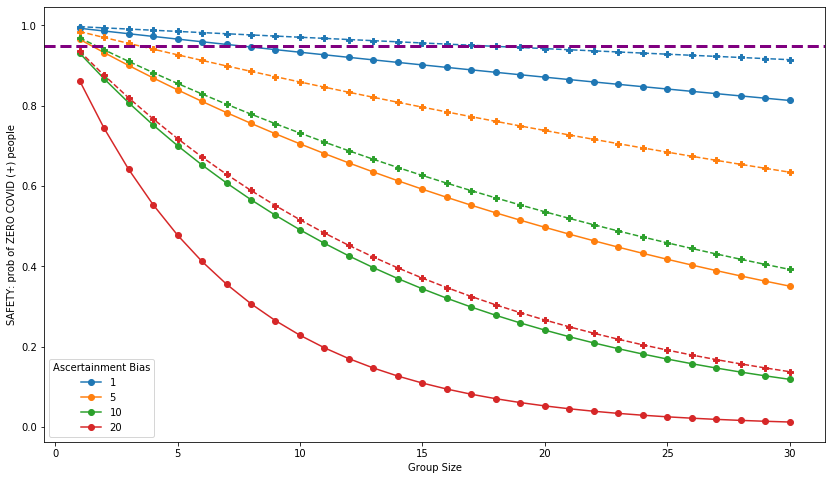

In [22]:
#draw a plot

    #make a big figure
fig = plt.figure(figsize=(14,8))

    #plot the pre-test probs
[plt.plot(df_pre.index, df_pre[b], marker='o') for b in a_biases]
    #plot the post-test probs
[plt.plot(df_post.index, df_post[b], marker='P', linestyle='--') for b in a_biases]

    #aesthetics
plt.legend(title='Ascertainment Bias', labels=a_biases)
plt.xlabel('Group Size')
plt.ylabel('SAFETY: prob of ZERO COVID (+) people')

        #make colors comparable
for l1, l2 in zip(fig.axes[0].lines[0:4], fig.axes[0].lines[4:8]): #it's ugly syntax, I know
    l2.set_color(l1.get_color())

plt.axhline(0.95, linestyle='--', color='purple', linewidth=3)

By getting everyone tested beforehand ("+" markers with dashed lines), we drastically increase the probability of a COVID free gathering, but rarely does that bump us above the 95% probability of safety (which again, is arbitrary). For our gathering of 13 with an ascertainment bias of 10x:

In [23]:
print('The probability of a COVID-free gathering increases from: ', df_pre.loc[13,10]*100, "% to: ", df_post.loc[13,10]*100, "%")

The probability of a COVID-free gathering increases from:  39.64616756155093 % to:  66.65695573771654 %


That's a huge "gain" of safety, but still leaves us with basically a 1/3 chance of having someone there with COVID and thereby creating a COVID exposure for everyone. One third of the time is hard to equate with "safe".

There are further assumptions that could be made that would increase the COVID-free probability, one simple one is considering co-dwelling attendees as a single unit since their states are likely tied. Whatever assumptions are made, the table of COVID free probability says it clearly: if you want to have a probability of gathering fully COVID free greater than 90% (even if everyone is tested), you have to end up with a group size (or effective group size after applying additional assumptions) that doesn't look much like a "group" at all.

#### For now, the main point is clear; a negative saliva COVID test in LA county appoximately halves your risk of having COVID. A group of 10 people increase the probability of their group being COVID free from ~33% (1 in 3) to ~66% (2 in 3) if they all receive negative COVID tests.

# But is is *appropriate* to gather at all?

Despite knowing how to interpret data and calculate the probability of safety, this doesn't automatically make it ok that we do so&mdash;even if we determined our gathering was 100% safe! In LA County, California and *some* places across the country, there are emergency rules in place restricting normal movement, social gatherings, and people's ability to work or engage in day to day activities. Breaking those rules may not carry any real consequences from law enforcement or what-have-you, but does carry real risk of transmitting disease and contributing to this public health crisis. In conversations with various folks, a number of important non-quantitative topics have come up:

-**Is gathering against the rules a case of "rules for thee but not for me"?** We are quick and happy to shred strangers, celebrities or hypocritical politicians caught on camera for acting in ways that would violate COVID safety rules. Sure we did the math, but does that exempt us from following the rules ourselves?

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
People in less fortunate situations are suffering during this pandemic for a lot of reasons. Gathering mostly safely is a special luxury many can't create or afford. On the other hand, gathering unsafely is a financial requirement for lots of "essential" workers. Everybody's best interest is served by the hastened end to the pandemic. It is a pure expression of privilege to gather against the rules, how does that affect our decisions?

-**What happens in the very possible situation that one or all of us gets COVID as a result of gathering?** Peope like celebrities and politicians&mdash;people with great access to information and safety precautions&mdash;get COVID left and right, probably by having events a lot like the one you or I might consider, with similar testing procedures. The whole point of the numbers above are to demonstrate that there is a significant non-zero probability of being exposed to COVID from a group member. Asymptomatic infection and false negatives really do exist; it is really possible to transmit infection even if you feel normal and you test negative. The responsibility gathering attendees carry by voluntarily opening themselves to infection is that *any infection stops with them*. Everbody needs to be absolutely sure they will not spread disease outside their household in the unfortunate case that they are infected.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Are there professional or social consequences of getting COVID? I haven't seen much discussion of the stigma of COVID infection, if there is any. Maybe it would be damaging in ways beyond biological to report an exposure or infection to your employer, family or friends. It might be especially bad if it is somehow learned that it was a result of breaking rules and gathering between households. Perhaps, upon reflection, you realize that you are personally attached to your COVID (-) status and would feel badly if you were infected (I am so attached, and I would definitely feel badly). Everyone's situation will be different, but it might be worth thinking about how other parts of your life might be affected by such bad luck.

It may be a while before the public at large is vaccinated and immune from COVID, which should be the prerequisite for reopening the world. As members of your family, work or social circle are vaccinated and receive negative COVID tests, consider that no immunity state or infection status is *absolutely* certain. To minimize the damage that can still be done during the tail end of the pandemic, please consider the real risks we continue to face in gathering, despite the powerful tools we are using to make the world safe. 